# Supervised learning - Classification

- Imbalanced dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, \
    StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.utils import resample

# Imbalanced dataset

In [2]:
df = pd.read_csv('../datasets/data_classification/nonsep.csv', sep=';', header=None)
df.columns = ['x', 'y', 'class']
df_imbalanced = df[df['class'] == -1].copy()
# df_imbalanced = df_imbalanced.append(df[df['class'] == 1].sample(n=10, random_state=42))
df_imbalanced = pd.concat([df_imbalanced, df[df['class'] == 1].sample(n=10, random_state=42)], ignore_index=True)
print(df.shape)
print(df_imbalanced.shape)

(140, 3)
(80, 3)


Text(0.5, 1.0, 'Imbalanced dataset')

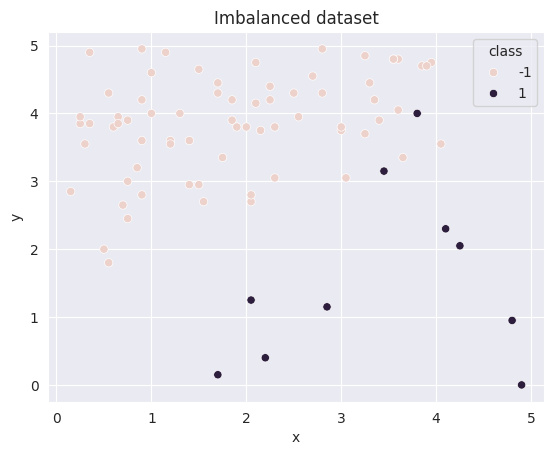

In [3]:
sns.scatterplot(data=df_imbalanced, x='x', y='y', hue='class')
plt.title('Imbalanced dataset')

## Train test split for evaluation
Be aware to do under/oversampling only for training split. Don't disturb class ratio in you test set of data. U want to have test set isolated from under/oversampling procedures, to mimic real data distribution for classificator evaluation. You add a lot of bias to the evaluation, when using under/oversampling methods for whole dataset.

In [4]:
df_train, df_test = train_test_split(df_imbalanced, test_size=0.5, stratify=df_imbalanced['class'], random_state=42)
X_train, X_test, y_train, y_test = df_train[df_train.columns[df_train.columns != 'class']].values, df_test[
    df_test.columns[df_test.columns != 'class']].values, df_train['class'].values, df_test['class'].values

Text(0.5, 1.0, 'Train set')

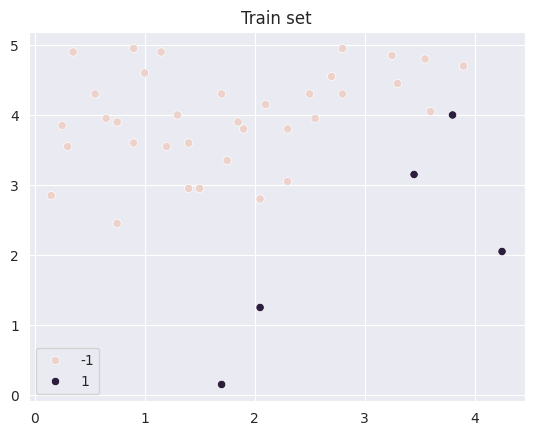

In [5]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set')

#### Class distribution in train set:

In [6]:
pd.Series(y_train).value_counts()

-1    35
 1     5
Name: count, dtype: int64

In [7]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.8888888888888888
test score is 0.7692307692307693


Text(0.5, 1.0, 'Evaluation of predictions on test set')

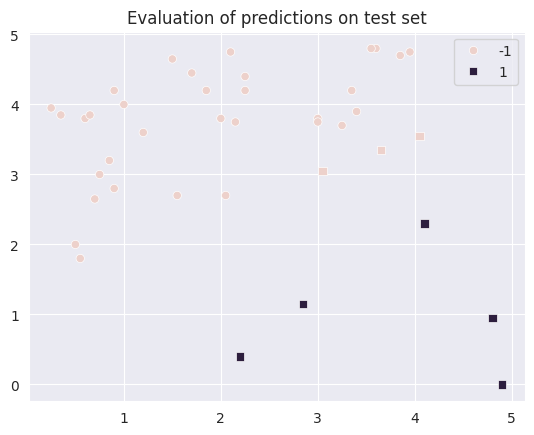

In [8]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o', 's'])
plt.title('Evaluation of predictions on test set')

## Undersampling

In [9]:
df_train_downsample = resample(df_train[df_train['class'] == -1],
                               replace=True,
                               n_samples=len(df_train[df_train['class'] == 1]),
                               random_state=42)
# df_train_downsample = df_train_downsample.append(df_train[df_train['class'] == 1])
df_train_downsample = pd.concat([df_train_downsample, df_train[df_train['class'] == 1]], ignore_index=True)
df_train_downsample.shape

(10, 3)

In [10]:
X_train, y_train = df_train_downsample[df_train_downsample.columns[df_train_downsample.columns != 'class']].values, \
    df_train_downsample['class'].values

Text(0.5, 1.0, 'Train set after downsampling')

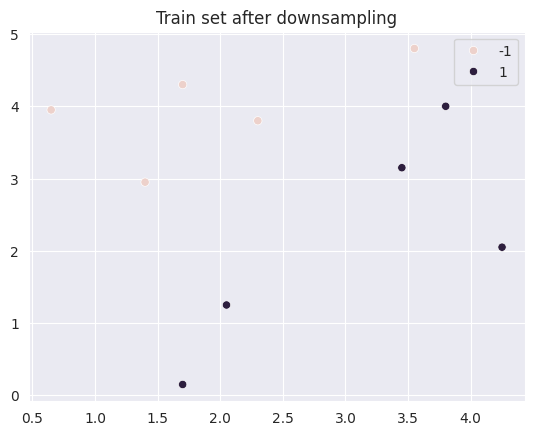

In [11]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after downsampling')

#### Class distribution in train set:

In [12]:
pd.Series(y_train).value_counts()

-1    5
 1    5
Name: count, dtype: int64

In [13]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 1.0
test score is 0.6666666666666666


Text(0.5, 1.0, 'Evaluation of predictions on test set')

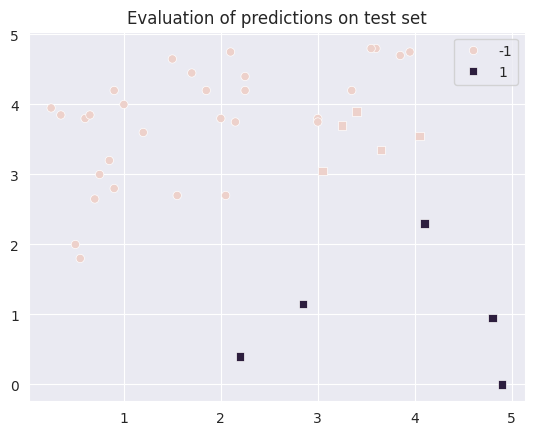

In [14]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o', 's'])
plt.title('Evaluation of predictions on test set')

## Oversampling

In [15]:
df_train_upsample = resample(df_train[df_train['class'] == 1],
                             replace=True,
                             n_samples=len(df_train[df_train['class'] == -1]),
                             random_state=42)
# df_train_upsample = df_train_upsample.append(df_train[df_train['class'] == -1])
df_train_upsample = pd.concat([df_train_upsample, df_train[df_train['class'] == -1]], ignore_index=True)
df_train_upsample.shape

(70, 3)

In [16]:
X_train, y_train = df_train_upsample[df_train_upsample.columns[df_train_upsample.columns != 'class']].values, \
    df_train_upsample['class'].values

Text(0.5, 1.0, 'Train set after upsampling')

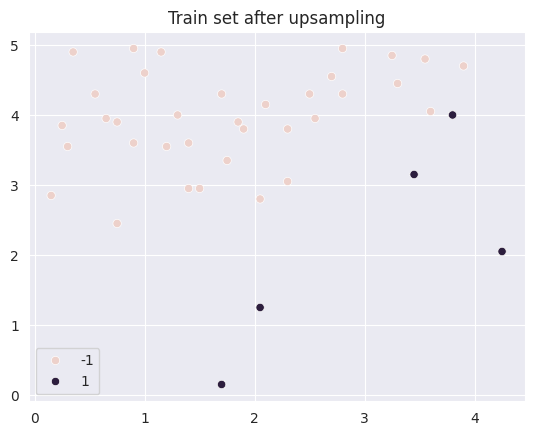

In [17]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after upsampling')

#### Class distribution in train set:

In [18]:
pd.Series(y_train).value_counts()

 1    35
-1    35
Name: count, dtype: int64

In [19]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.9859154929577465
test score is 0.6666666666666666


Text(0.5, 1.0, 'Evaluation of predictions on test set')

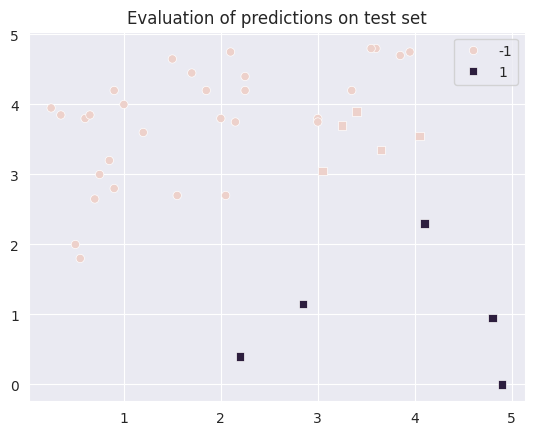

In [20]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o', 's'])
plt.title('Evaluation of predictions on test set')

## SMOTE

Instalation of Python library with SMOTE:

- ``pip install imbalanced-learn``

https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc

In [21]:
from imblearn.over_sampling import SMOTE

su = SMOTE(random_state=42, k_neighbors=4)
X_train, y_train = df_train[df_train.columns[df_train.columns != 'class']].values, df_train['class'].values
X_train, y_train = su.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((70, 2), (70,))

Text(0.5, 1.0, 'Train set after SMOTE')

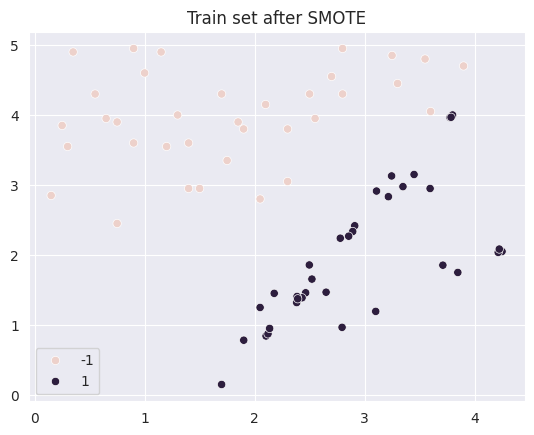

In [22]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after SMOTE')

#### Class distribution in train set:

In [23]:
pd.Series(y_train).value_counts()

-1    35
 1    35
Name: count, dtype: int64

In [24]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.9859154929577465
test score is 0.7692307692307693


Text(0.5, 1.0, 'Evaluation of predictions on test set')

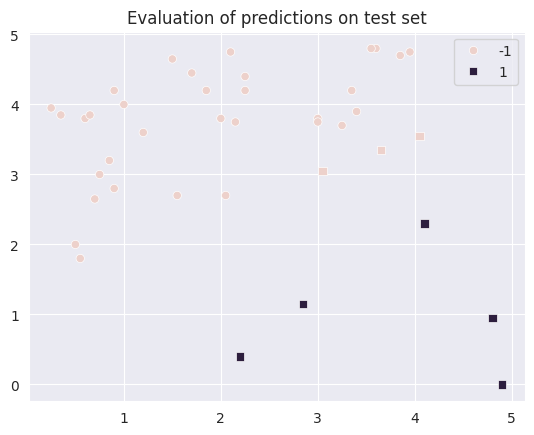

In [25]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o', 's'])
plt.title('Evaluation of predictions on test set')

### Imbalanced learn library
- U can find other methods for under/over sampling in library's documentation: https://imbalanced-learn.org/stable/references/index.html#api
- U can find similar methods as SMOTE for over sampling on following page: https://imbalanced-learn.org/stable/references/over_sampling.html

# Ensamble classifiers

Explain following terms:
- Bagging
- Boosting
- Stacking

Studing materials:
- Lectures - https://homel.vsb.cz/~pla06/
- https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/
- https://scikit-learn.org/stable/modules/ensemble.html#ensemble
- https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble